Refer to the lectures, implement Bayesian classifier from scratch, use it on MNIST dataset, and test.

Generate the confusion matrix and F1 score for each Dist.

#Loading MNIST Dataset

In [19]:
import numpy as np
from keras.datasets import mnist
from keras.utils import np_utils
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.naive_bayes import GaussianNB

# loading MNIST from server
(X_train, Y_train),(X_test, Y_test)= mnist.load_data()

#the data into a format suitable for training 
X_train = X_train.reshape(X_train.shape[0], 28*28) 
X_test = X_test.reshape(X_test.shape[0], 28*28) 

#Define the prior probabilities of each class
classes = np.unique(Y_train)
priorprob = np.array([np.sum(Y_train == c)/len(Y_train) for c in classes])


#Fit the Bayesian classifier
def fit(Xtrain, ytrain):
    # Initialize the dictionary of parameters
    parameters = {}

    # Calculate the mean of each class
    for c in classes:
        parameters[c] = {}
        X_c = X_train[Y_train == c]
        parameters[c]['mean'] = np.mean(X_c, axis=0)
        # Calculate the covariance of each class
        parameters[c]['cov'] = np.cov(X_c.T)

    return parameters

#Make predictions

def predict(Xtest, parameters):
    # Initialize an array to store the predictions
    ypred = np.zeros(Xtest.shape[0])
    # Calcuate the posterior probabilities for each class
    for i in range(Xtest.shape[0]):
        postprob = np.array([np.sum(np.log(np.diagonal(parameters[c]['cov'])))+ np.sum((Xtest[i]- parameters[c]['mean'])*2 / (2*parameters[c]['cov']))+np.log(priorprob[c]) for c in classes])
        ypred[i] = classes[postprob.argmax()]
    return ypred

#Generate the confusion matrix and F1 score for each Dist.

parameters = fit(X_train, Y_train)
ypred = predict(X_test, parameters)

#Confusion matrix 
conf_matrix = confusion_matrix(Y_test, ypred) 
 
#calculating the f1 score 
f1 = f1_score(Y_test, ypred, average=None) 

#calculating the classification report
classif_report= classification_report(Y_test, ypred)

#calculatig accuracy
accuracy = (ypred == Y_test).mean()
 
print("Confusion Matrix:") 
print(conf_matrix) 
 
print("F1 Score:") 
print(f1)

print("classification_report")
print(classif_report)


print("Accuracyof the model:", (accuracy*100),"%")

<ipython-input-19-3c523f38281a>:44: RuntimeWarning: divide by zero encountered in log
  postprob = np.array([np.sum(np.log(np.diagonal(parameters[c]['cov'])))+ np.sum((Xtest[i]- parameters[c]['mean'])*2 / (2*parameters[c]['cov']))+np.log(priorprob[c]) for c in classes])
<ipython-input-19-3c523f38281a>:44: RuntimeWarning: divide by zero encountered in true_divide
  postprob = np.array([np.sum(np.log(np.diagonal(parameters[c]['cov'])))+ np.sum((Xtest[i]- parameters[c]['mean'])*2 / (2*parameters[c]['cov']))+np.log(priorprob[c]) for c in classes])
<ipython-input-19-3c523f38281a>:44: RuntimeWarning: invalid value encountered in true_divide
  postprob = np.array([np.sum(np.log(np.diagonal(parameters[c]['cov'])))+ np.sum((Xtest[i]- parameters[c]['mean'])*2 / (2*parameters[c]['cov']))+np.log(priorprob[c]) for c in classes])
/usr/local/lib/python3.8/dist-packages/numpy/core/fromnumeric.py:86: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **pass

Confusion Matrix:
[[ 980    0    0    0    0    0    0    0    0    0]
 [1135    0    0    0    0    0    0    0    0    0]
 [1032    0    0    0    0    0    0    0    0    0]
 [1010    0    0    0    0    0    0    0    0    0]
 [ 982    0    0    0    0    0    0    0    0    0]
 [ 892    0    0    0    0    0    0    0    0    0]
 [ 958    0    0    0    0    0    0    0    0    0]
 [1028    0    0    0    0    0    0    0    0    0]
 [ 974    0    0    0    0    0    0    0    0    0]
 [1009    0    0    0    0    0    0    0    0    0]]
F1 Score:
[0.17850638 0.         0.         0.         0.         0.
 0.         0.         0.         0.        ]
classification_report
              precision    recall  f1-score   support

           0       0.10      1.00      0.18       980
           1       0.00      0.00      0.00      1135
           2       0.00      0.00      0.00      1032
           3       0.00      0.00      0.00      1010
           4       0.00      0.00      0.00

/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [28]:

clf = GaussianNB()
clf.fit(X_train, Y_train)

y_pred = clf.predict(X_test)

#Generate the confusion matrix and F1 score

#Confusion matrix 
conf_matrix = confusion_matrix(Y_test, y_pred) 
 
#calculating the f1 score 
f1 = f1_score(Y_test, ypred, average= None) 

#calculating the classification report
classif_report= classification_report(Y_test, y_pred)

#calculatig accuracy
accuracy = (y_pred == Y_test).mean()
 
print("Confusion Matrix:") 
print(conf_matrix) 
 
print("F1 Score:") 
print(f1)

print("classification_report")
print(classif_report)


print("Accuracyof the model:", (accuracy*100),"%")

Confusion Matrix:
[[ 870    0    3    5    2    5   31    1   35   28]
 [   0 1079    2    1    0    0   10    0   38    5]
 [  79   25  266   91    5    2  269    4  271   20]
 [  32   39    6  353    2    3   51    8  409  107]
 [  19    2    5    4  168    7   63    7  210  497]
 [  71   25    1   20    3   44   40    2  586  100]
 [  12   12    3    1    1    7  895    0   26    1]
 [   0   15    2   10    5    1    5  280   39  671]
 [  13   72    3    7    3   11   12    4  648  201]
 [   5    7    3    6    1    0    1   13   18  955]]
F1 Score:
[0.17850638 0.         0.         0.         0.         0.
 0.         0.         0.         0.        ]
classification_report
              precision    recall  f1-score   support

           0       0.79      0.89      0.84       980
           1       0.85      0.95      0.90      1135
           2       0.90      0.26      0.40      1032
           3       0.71      0.35      0.47      1010
           4       0.88      0.17      0.29

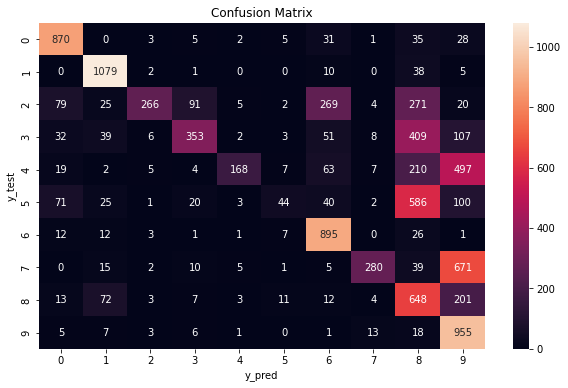

In [29]:
cm = confusion_matrix(Y_test, y_pred)
plt.subplots(figsize=(10, 6))
sns.heatmap(cm, annot = True, fmt = 'g')
plt.xlabel("y_pred")
plt.ylabel("y_test")
plt.title("Confusion Matrix")
plt.show()